In [8]:
import pandas as pd
data = pd.read_csv('titanic.csv')
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [10]:
fare_mean = data['Fare'].mean()
print("Średnia opłata (Fare) wynosi:", fare_mean)

Średnia opłata (Fare) wynosi: 32.204207968574636


In [12]:
fare_median = data['Fare'].median()
print("Mediana opłaty (Fare) wynosi:", fare_median)

Mediana opłaty (Fare) wynosi: 14.4542


Oznacza to, że połowa pasażerów zapłaciła mniej niż tę kwotę, co sugeruje, że większość opłat była stosunkowo niska.

In [14]:
fare_mode = data['Fare'].mode()[0]
print("Moda opłaty (Fare) wynosi:", fare_mode)

Moda opłaty (Fare) wynosi: 8.05


 Oznacza to, że najwięcej pasażerów zapłaciło właśnie tę kwotę

Drukuje histogram opłat (Fare) i rysuje na nim linie dla średniej, mediany oraz mody:

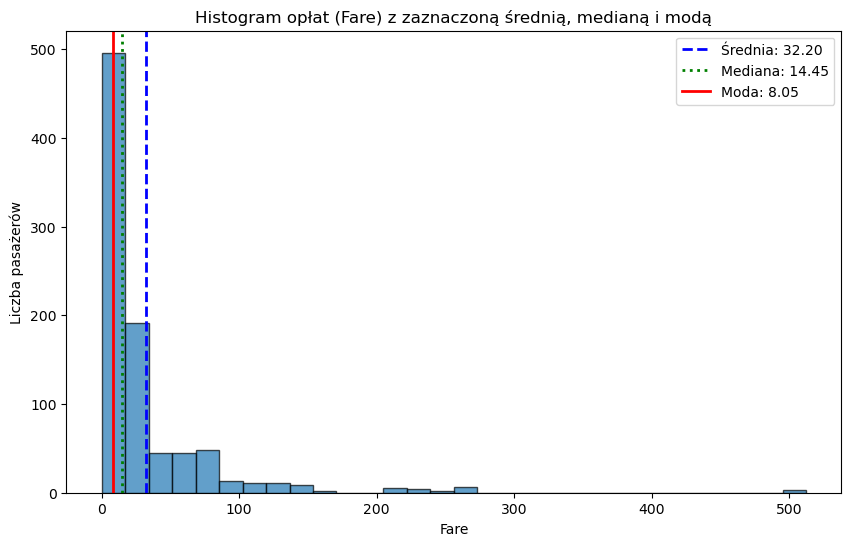

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['Fare'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(fare_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Średnia: {fare_mean:.2f}')
plt.axvline(fare_median, color='green', linestyle='dotted', linewidth=2, label=f'Mediana: {fare_median:.2f}')
plt.axvline(fare_mode, color='red', linestyle='solid', linewidth=2, label=f'Moda: {fare_mode:.2f}')
plt.xlabel('Fare')
plt.ylabel('Liczba pasażerów')
plt.title('Histogram opłat (Fare) z zaznaczoną średnią, medianą i modą')
plt.legend()
plt.show()

Histogram nam pokazuje, że większość pasażerów zapłaciła stosunkowo niskie opłaty, co widać w skupieniu wartości po lewej stronie wykresu. Oznacza to, że tańsze bilety były częstsze, prawdopodobnie związane z niższymi klasami pasażerskimi.
Średnia (niebieska linia): Średnia opłata jest trochę przesunięta na prawo od głównego skupienia danych. Wskazuje to, że w rozkładzie występują pewne wyższe wartości, które podnoszą średnią. Jest to efekt skrajnych, wyższych opłat, które „ciągną” średnią w górę.
Mediana (zielona linia): Mediana jest niższa niż średnia i bliższa głównemu skupieniu wartości. Jest to wartość środkowa, więc wskazuje, że połowa pasażerów zapłaciła mniej niż ta kwota, a druga połowa więcej. W przypadku asymetrycznego rozkładu, jak tutaj, mediana jest często bardziej reprezentatywna niż średnia.
Moda (czerwona linia): Moda, czyli najczęściej występująca wartość, jest jeszcze niższa i reprezentuje najpopularniejszą opłatę. Sugeruje, że największa liczba pasażerów zapłaciła właśnie tyle. Jest to dobra miara „typowej” opłaty dla większości pasażerów

Wyznaczam kwartyle,które pomogą nam zobaczyć, jak rozkładają się opłaty(Fare)

In [18]:
import numpy as np
fare_values = data['Fare'].values
q0 = np.quantile(fare_values, 0.0) 
q1 = np.round(np.quantile(fare_values, 0.25), 2)
median_fare = np.round(np.quantile(fare_values, 0.5), 2)
q3 = np.round(np.quantile(fare_values, 0.75), 2)
q4 = np.quantile(fare_values, 1.0)
print(f'Q0 (minimum): {q0}')
print(f'Q1 (pierwszy kwartyl): {q1}')
print(f'Q2 (mediana): {median_fare}')
print(f'Q3 (trzeci kwartyl): {q3}')
print(f'Q4 (maksimum): {q4}')

Q0 (minimum): 0.0
Q1 (pierwszy kwartyl): 7.91
Q2 (mediana): 14.45
Q3 (trzeci kwartyl): 31.0
Q4 (maksimum): 512.3292


Wynik pokazuje, że opłaty(Fare) są mocno zróżnicowane: 25% pasażerów zapłaciło mniej niż 7.91 funta połowa zapłaciła mniej niż 14.45 funta a tylko 25% zapłaciło więcej niż 31funtów przy czym najwyższa opłata sięga aż 512.33 funtów, co wskazuje na obecność bardzo wysokich cen biletów dla niektórych pasażerów.
Dodaje do wizualizacji kwartyle:

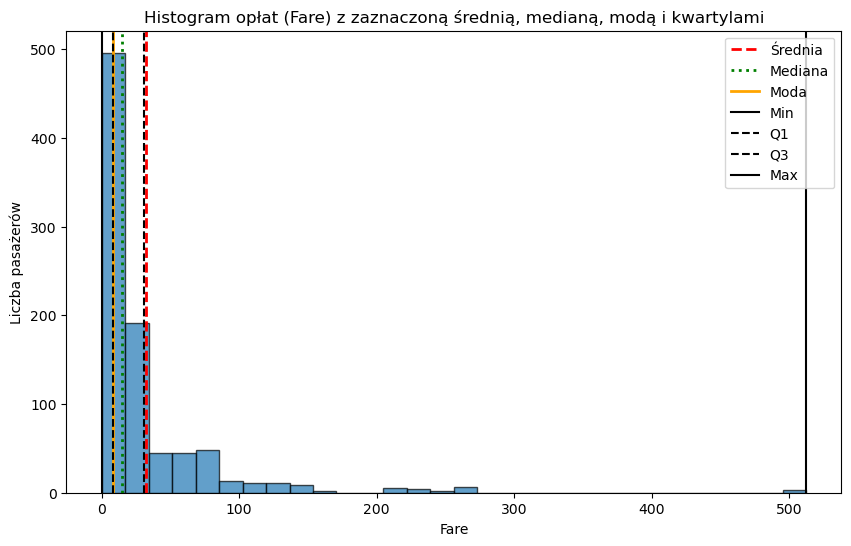

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(fare_values, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=fare_mean, color='red', linestyle='dashed', linewidth=2, label='Średnia')
plt.axvline(x=fare_median, color='green', linestyle='dotted', linewidth=2, label='Mediana')
plt.axvline(x=fare_mode, color='orange', linestyle='solid', linewidth=2, label='Moda')
plt.axvline(x=q0, color='black', linestyle='solid', label='Min')
plt.axvline(x=q1, color='black', linestyle='dashed', label='Q1')
plt.axvline(x=q3, color='black', linestyle='dashed', label='Q3')
plt.axvline(x=q4, color='black', linestyle='solid', label='Max')
plt.xlabel('Fare')
plt.ylabel('Liczba pasażerów')
plt.title('Histogram opłat (Fare) z zaznaczoną średnią, medianą, modą i kwartylami')
plt.legend(loc='upper right')
plt.show()

Wnioski: widać, że większość pasażerów zapłaciła stosunkowo niskie opłaty (Fare), co odzwierciedla skupienie wartości w niskich przedziałach z bardzo niewielką liczbą wysokich opłat. Minimalna wartość opłaty jest bliska zeru, podczas gdy maksymalna sięga około 500,co wskazuje na dużą rozpiętość cen biletów, z nielicznymi ekstremalnie wysokimi wartościami, które wpływają na średnią. 
Wyznaczam zakres opłat czyli obliczam różnicę między maksymalna a minimalną wartością.

In [29]:
fare_range = max(fare_values) - min(fare_values)
print(fare_range)

512.3292


Oznacza to, ze jest duża rozpiętość, która wskazuje na znaczne róznice w cenach biletów. Wysoka wartość zakresu jest również wynikiem obecnosci kilku bardzo wysokich opłat, które znacznie podnoszą maksimum w danych.
Wyznaczam rozstęp międzykwartylowy IQR:

In [23]:
iqr = q3 - q1
print(iqr)

23.09


In [ ]:
Wartość 23.09 funta oznacza, że opłaty dla środkowych 50% pasażerów były stosunkowo blisko siebie, mimo
że w całym zbiorze występują skrajne, wysokie wartości.
Rysuje wykres pudełkowy dla zmiennej Fare :

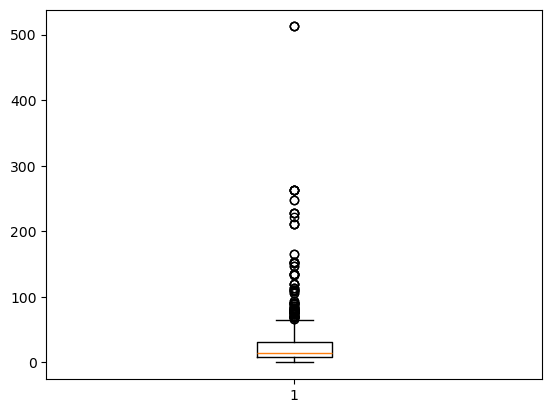

In [25]:
plt.boxplot(fare_values)
plt.show()

Zauważalny jest asymetryczny rozkład opłat, z większością danych blisko niższych wartości i kilkoma bardzo wysokimi opłatami, które stanowią wartości odstające.

In [27]:
fare_variance = data['Fare'].var()
print("Wariancja dla opłat (Fare):", fare_variance)

Wariancja dla opłat (Fare): 2469.436845743117


Taka wysoka wariancja wskazuje na dużą zmienność w cenach biletów, co może być spowodowane obecnością kilku bardzo wysokich opłat (dla pasażerów pierwszej klasy), które znacznie podnoszą rozproszenie danych.
Wyliczam odchylenie standardowe :

In [33]:
print(fare_variance**(1/2))

49.693428597180905


Wartość 49.69 funta, wskazuję na znaczną zmienność w cenach biletów. Oznacza to, że opłaty pasażerów mogą znacząco odbiegać od średniej, co najprawdopodobniej jest wynikiem dużych różnic między cenami biletów w różnych klasach pasażerskich. Tak wysokie odchylenie standardowe pokazuje, że w zbiorze danych znajdują się wartości odstające, czyli bardzo wysokie opłaty, które zwiększają rozrzut cenowy.
Wyznaczam współczynnik asymetrii- wynik wskaże nam czy rozkład opłat jest symetryczny, czy ma skłonność do asymetrii:

In [35]:
fare_skewness = data['Fare'].skew()
print("Współczynnik asymetrii dla opłat (Fare):", fare_skewness)

Współczynnik asymetrii dla opłat (Fare): 4.787316519674893


Patrząc na histogram, który przedstawia rozkład zmiennej Fare + wyliczony współczynnik asymetrii= Wniosek-silna prawoskośność rozkładu.
Oznacza to : 
1.Długi ogon po prawej stronie - widać, że rozkład opłat jest przesunięty po prawej stronie. Oznacza to, że większość pasażerów zapłaciła niskie opłaty, ale w zbiorze znajdują się także nieliczne, bardzo wysokie opłaty.
2.Wpływ wysokich wartości(biletów pierwszej klasy):Wysoka skośność oznacza, że te skrajne, wysokie wartości mają znaczny wpływ na ogólny kształt rozkładu czyli bilety trzeciej klasy w porównaniu z pierwszą klasą.
3.Przy tak wysokiej asymetrii , mediana jest trafnym wsaznikiem "typowej" opłaty dla większości pasażerów.
Współczynnik asymetrii wskazuje na to, że rozkład opłat jest zdecydowanie niesymetryczny i że większość pasażerów zapłaciła niskie opłaty, a tylko nieliczni – bardzo wysokie.

Scalowanie zmiennej - standaryzacja przesuwa dane tak, aby miały średnią 0 i odchylenie standardowe 1, co pomaga zobaczyć, jak wartosci są rozproszone wokół średniej i czy nadal są asymetryczne po skalowaniu.

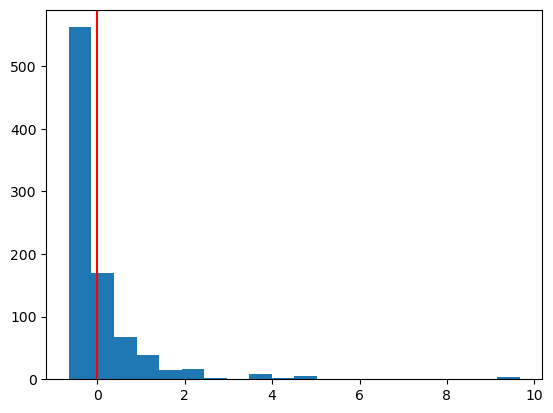

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [47]:
from sklearn.preprocessing import StandardScaler
scaler_standardized = StandardScaler()
fare_standardized_values = scaler_standardized.fit_transform(fare_values.reshape(-1, 1))
plt.hist(fare_standardized_values, bins=20)
plt.axvline(x = fare_standardized_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {fare_standardized_values.mean()}')
print(f'Odchylenie standardowe: {np.std(fare_standardized_values, ddof=1)}')

Wniosek: Standaryzacja zmniejszyła skalę, ale nie zmieniła rozkładu. Opłaty Fare mają rozkład asymetryczny z dużą koncentracją wokół niskich wartości oraz kilkoma wysokimi wartościami odstającymi.

Rysuje wykres punktowy , który pokaze nam zalezność między opłatą (Fare) a liczbą rodzeństwa i współmałzonków na pokładzie (SibSp)

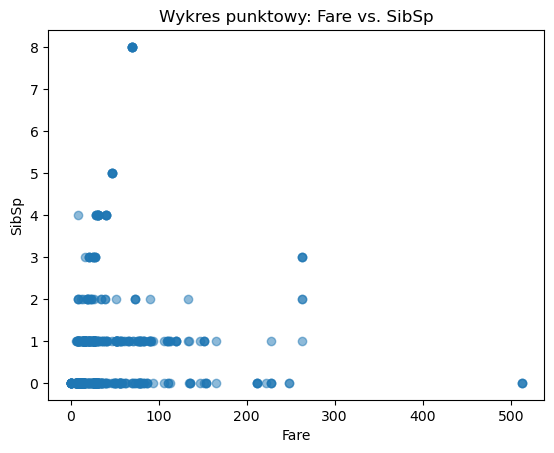

In [53]:
fare_values = data.loc[data['Fare'].notnull(), 'Fare'].values
sibsp_values = data.loc[data['Fare'].notnull(), 'SibSp'].values

plt.scatter(x=fare_values, y=sibsp_values, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('SibSp')
plt.title('Wykres punktowy: Fare vs. SibSp')
plt.show()

Wnioski: Wydaje się, że liczba towarzyszy ma pewien wpływ na wysokość opłat, szczególnie dla bardzo wysokich opłat. Jednak nie ma wyraźnej liniowej korelacji – raczej ogólna tendencja, że wyższe opłaty występują częściej przy mniejszej liczbie towarzyszy, a większe rodziny płaciły zazwyczaj niższe ceny.

In [57]:
correlation_pearson = data['Fare'].corr(data['SibSp'])
print("Współczynnik korelacji Pearsona między Fare a SibSp:", correlation_pearson)

Współczynnik korelacji Pearsona między Fare a SibSp: 0.15965104324216087


Oznacza to, że: wartość 0,16 jest bliska zeru, co sugeruje, że liczba towarzyszy na pokładzie (SibSp) ma minimalny wpływ na wysokość opłaty (Fare) oraz dodatnia wartość wskazuje, że bardzo delikatnie wyższa liczba towarzyszy jest związana z wyższymi opłatami, ale ta zależność jest tak słaba, że prawdopodobnie nie ma praktycznego znaczenia. Na podstawie tej korelacji nie możemy jednoznacznie stwierdzić, że wzrost liczby towarzyszy wpływa na wzrost opłat.
Podsumowując, współczynnik korelacji pokazuje, że nie istnieje silna zależność między Fare a SibSp, co jest zgodne z obserwacjami z wykresu punktowego.